# Introduction
For this project, you will interpret data from the National Parks Service **about endangered species** in different parks.

You will perform some data analysis on the **conservation statuses of these species and investigate if there are any patterns** or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

Questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks.

## Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading data

In [2]:
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

### Data exploration of `Species.csv`

In [3]:
print("This df has a shape of:", species.shape)

This df has a shape of: (5824, 4)


In [4]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [5]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
for col in species.columns:
    print(f"{col} values: {species[col].unique()}")
    print()

category values: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

scientific_name values: ['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']

common_names values: ["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']

conservation_status values: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']



In [7]:
print(f"Number of species:{species.scientific_name.nunique()}")

Number of species:5541


In [8]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Vacular Plants is the biggest category by far

In [9]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [10]:
print( "Without conservation status", round(species["conservation_status"].isna().sum()/ len(species["conservation_status"]),6))
print( "Without conservation status", round((len(species["conservation_status"]) - species["conservation_status"].isna().sum())/ len(species["conservation_status"]),6))

Without conservation status 0.967205
Without conservation status 0.032795


*What is the distribution of conservation status for species?*

Most species are not in concern (5633). But there are 191 species under a conservation status, most of them are species of concern

The `species_info.csv` contains information on the different species in the National Parks (5824 entries). The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

It seems that most of the values in **conservation_status** are *NaN*

There are a 7 categories Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant and Nonvascular Plant

There are 5541 species, most of them belongs to the category of Vascular plants

### Data exploration of `observations.csv`

In [11]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [12]:
print("This df shapes is of:", observations.shape)

This df shapes is of: (23296, 3)


In [13]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


There aren't any NaN values in this df

In [14]:
observations["observations"].describe()

count    23296.000000
mean       142.287904
std         69.890532
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64

In [15]:
print("Total observations:", observations.observations.sum())

Total observations: 3314739


In [16]:
print("Number of unique species observed:", observations["scientific_name"].nunique())

Number of unique species observed: 5541


`observation.csv` have the same amount of species as `species_info.csv`

In [17]:
print(f"Number of parks:{observations.park_name.nunique()}")
print(f"parks names:{observations.park_name.unique()}")

Number of parks:4
parks names:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


### Analysis

Species_info.csv

Manage NaN values of conservation_status column in `species_info.csv`

In [18]:
species["conservation_status"].fillna("without concerns", inplace=True)

In [19]:
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
Species of Concern     161
Threatened              10
without concerns      5633
dtype: int64

In [20]:
species.conservation_status.value_counts(normalize=True)

without concerns      0.967205
Species of Concern    0.027644
Endangered            0.002747
Threatened            0.001717
In Recovery           0.000687
Name: conservation_status, dtype: float64

In [21]:
conservation = species[species.conservation_status != "without concerns"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count().unstack()

conservation

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Mammal is the only category that appears in all conservation status and is the category with more species endagered

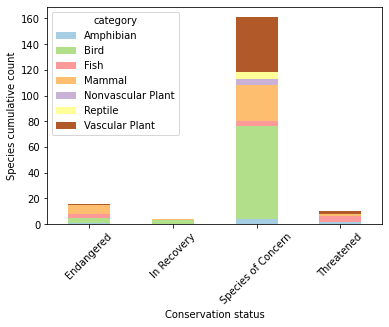

In [22]:
conservation.plot(kind="bar", stacked=True, colormap="Paired")
plt.xlabel("Conservation status")
plt.ylabel("Species cumulative count")
plt.xticks(rotation=45)
plt.show()

In [23]:
protected = species[["category", "conservation_status"]]\
    [species.conservation_status != "without concerns"]\
    .groupby("category").count()

protected

,conservation_status
category,
Amphibian,7
Bird,79
Fish,11
Mammal,38
Nonvascular Plant,5
Reptile,5
Vascular Plant,46


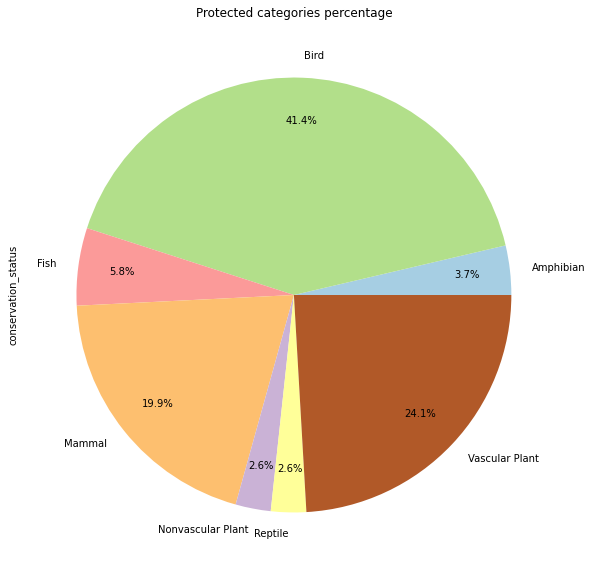

In [24]:
protected.plot(kind="pie", subplots=True, autopct='%1.1f%%',\
                figsize=(15,10), colormap="Paired",legend=None,\
                pctdistance=.80)
plt.title("Protected categories percentage")
plt.show()

Birds are the category with more number of species under a conservational status

In [25]:
protected["without_concerns"] = species[["category", "conservation_status"]]\
    [species.conservation_status == "without concerns"]\
    .groupby("category").count()

protected['protected_percent'] = 100 * protected.conservation_status / (protected.conservation_status + protected.without_concerns)

protected

,conservation_status,without_concerns,protected_percent
category,,,
Amphibian,7,73,8.750000
Bird,79,442,15.163148
Fish,11,116,8.661417
Mammal,38,176,17.757009
Nonvascular Plant,5,328,1.501502
Reptile,5,74,6.329114
Vascular Plant,46,4424,1.029083


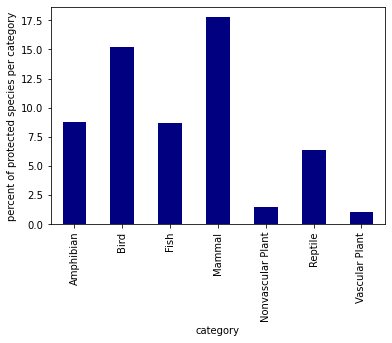

In [26]:
protected['protected_percent'].plot(kind='bar', colormap="jet")
plt.ylabel("percent of protected species per category")
plt.show()

*Are certain types of species more likely to be endangered?*

Mammals and Birds had the highest percentage of species being in protection.

In [27]:
from scipy.stats import chi2_contingency

signif = []

categories = protected.index

for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
    
        category1 = protected.loc[categories[i]]
        category2 = protected.loc[categories[j]]
        
        contingency = [[category1["conservation_status"], category1["without_concerns"]],
                      [category2["conservation_status"], category2["without_concerns"]]]
        
        chi2, p, _, _ = chi2_contingency(contingency)

        alpha = 0.05
        
        if p < alpha:
            signif.append((categories[i], categories[j], p))

mammal = [x for x in signif if "Mammal" in x]
bird = [x for x in signif if "Bird" in x]
print("Mammal")
for par in mammal:
    print(f"There is a statistical difference between: {par[0]} and {par[1]}, p-valor: {par[2]}")
print()
print("Bird")
for par in bird:
    print(f"There is a statistical difference between: {par[0]} and {par[1]}, p-valor: {par[2]}")

Mammal
There is a statistical difference between: Fish and Mammal, p-valor: 0.031145264082780608
There is a statistical difference between: Mammal and Nonvascular Plant, p-valor: 1.681893074469572e-11
There is a statistical difference between: Mammal and Reptile, p-valor: 0.02338465214871547
There is a statistical difference between: Mammal and Vascular Plant, p-valor: 1.7349112437604003e-70

Bird
There is a statistical difference between: Bird and Nonvascular Plant, p-valor: 1.355139751924416e-10
There is a statistical difference between: Bird and Vascular Plant, p-valor: 9.296288431402029e-84


*Are the differences between species and their conservation status significant?*

Yes, for example there is a statistical difference between mammals and 4 other categories. And bird and two other categories.


observations.csv

Which animal is most prevalent and what is their distribution amongst parks?

In [28]:
import string 

# Create a translation table 
translator = str.maketrans('', '', string.punctuation) 

animals = species.loc[(species["category"] != 'Vascular Plant') & (species["category"] != 'Nonvascular Plant'), "common_names"]

animal_names = []
for name in animals:
    name = name.translate(translator)
    for word in list(dict.fromkeys(name.split())):
        animal_names.append(word) 
    

In [29]:
import collections

sorted_names = collections.Counter(animal_names).most_common()

sorted_names

[('Warbler', 59),
 ('Northern', 53),
 ('Salamander', 41),
 ('Eastern', 39),
 ('American', 37),
 ('Common', 31),
 ('Western', 31),
 ('Sparrow', 29),
 ('Snake', 28),
 ('Mountain', 23),
 ('Bat', 23),
 ('Shiner', 20),
 ('Gray', 19),
 ('Darter', 19),
 ('Shrew', 18),
 ('Flycatcher', 18),
 ('Owl', 18),
 ('California', 18),
 ('Black', 17),
 ('Myotis', 17),
 ('Red', 16),
 ('Mouse', 16),
 ('Spotted', 14),
 ('Frog', 14),
 ('Chipmunk', 13),
 ('Brown', 12),
 ('Southern', 12),
 ('Squirrel', 12),
 ('Woodpecker', 12),
 ('Vole', 11),
 ('Sandpiper', 11),
 ('Turtle', 11),
 ('Trout', 11),
 ('Blue', 10),
 ('Wren', 10),
 ('Great', 10),
 ('Sierra', 10),
 ('Gull', 9),
 ('Vireo', 9),
 ('Lizard', 9),
 ('Fox', 8),
 ('Water', 8),
 ('Hawk', 8),
 ('Hummingbird', 8),
 ('Swallow', 8),
 ('Least', 7),
 ('Rock', 7),
 ('Goose', 7),
 ('Tern', 7),
 ('Greater', 7),
 ('Pine', 7),
 ('Finch', 7),
 ('Yellow', 7),
 ('Grebe', 7),
 ('Skink', 7),
 ('Toad', 7),
 ('Sucker', 7),
 ('Dace', 7),
 ('Chub', 7),
 ('Pacific', 7),
 ('WhiteTai

The most prevalent animal is the webbler 

In [30]:
species['Warbler'] = species.common_names.str.contains(r"\bWarbler\b", regex = True)

In [31]:
species[species.Warbler]

,category,scientific_name,common_names,conservation_status,Warbler
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,without concerns,True
247,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,without concerns,True
248,Bird,Dendroica castanea,Bay-Breasted Warbler,without concerns,True
249,Bird,Dendroica cerulea,Cerulean Warbler,without concerns,True
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,without concerns,True
251,Bird,Dendroica discolor,Prairie Warbler,without concerns,True
252,Bird,Dendroica dominica,Yellow-Throated Warbler,without concerns,True
253,Bird,Dendroica fusca,Blackburnian Warbler,without concerns,True
254,Bird,Dendroica magnolia,Magnolia Warbler,without concerns,True
255,Bird,Dendroica palmarum,Palm Warbler,without concerns,True


In [32]:
observations_Warbler = observations.merge(species[species.Warbler])
observations_Warbler

,scientific_name,park_name,observations,category,common_names,conservation_status,Warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,without concerns,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Bird,Orange-Crowned Warbler,without concerns,True
2,Vermivora celata,Yellowstone National Park,281,Bird,Orange-Crowned Warbler,without concerns,True
3,Vermivora celata,Bryce National Park,121,Bird,Orange-Crowned Warbler,without concerns,True
4,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,without concerns,True
...,...,...,...,...,...,...,...
231,Oreothlypis virginiae,Bryce National Park,84,Bird,Virginia's Warbler,without concerns,True
232,Setophaga petechia,Great Smoky Mountains National Park,82,Bird,Yellow Warbler,without concerns,True
233,Setophaga petechia,Yellowstone National Park,245,Bird,Yellow Warbler,without concerns,True
234,Setophaga petechia,Bryce National Park,134,Bird,Yellow Warbler,without concerns,True


In [33]:
observations_Warbler.conservation_status.unique()

array(['without concerns', 'Species of Concern', 'Endangered'],
      dtype=object)

In [34]:
observations_Warbler.groupby('park_name').observations.sum()

park_name
Bryce National Park                     5760
Great Smoky Mountains National Park     4435
Yellowstone National Park              14487
Yosemite National Park                  8712
Name: observations, dtype: int64

In [35]:
warbler_obs_conservation_parks = observations_Warbler.groupby(['park_name', 'conservation_status']).observations.sum().unstack()
warbler_obs_conservation_parks

conservation_status,Endangered,Species of Concern,without concerns
park_name,,,
Bryce National Park,20,175,5565
Great Smoky Mountains National Park,18,127,4290
Yellowstone National Park,58,434,13995
Yosemite National Park,45,226,8441


Warbler distribution amongst parks

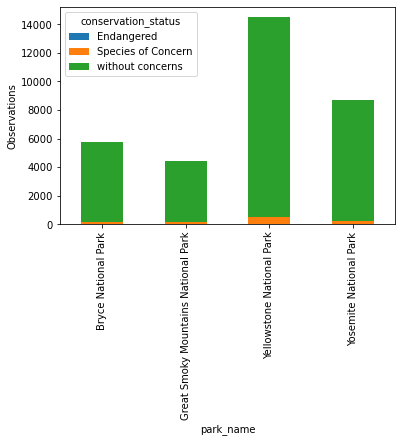

In [36]:
warbler_obs_conservation_parks.plot(kind="bar", stacked=True)
plt.ylabel("Observations")
plt.show()